In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [33]:
(x,y),(x_,y_) = mnist.load_data()
x = x.reshape(-1,784)
x=x/255.0
x_ = x_.reshape(-1,784)

print (x.shape,y.shape)
print (x_.shape,y_.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [34]:
split = int(x.shape[0]*0.80)

x_train = x[:split]
y_train = y[:split]
x_val = x[split:]
y_val = y[split:]
x_test = x_ 
y_test = y_

print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


In [0]:
IMG_SIZE = 28*28
H1_SIZE = 256
H2_SIZE = 64
OUT_SIZE = 10
BATCH_SIZE = 256
EPOCH = 50
ALPHA = 0.001

In [0]:
def accuracy(pred,y):
    return (100.0* np.sum(pred==y) / y.shape[0])

In [0]:
def initial_weights():
    np.random.seed(0)
    model = {}
    model['W1'] = np.random.randn(IMG_SIZE,H1_SIZE)/ np.sqrt(IMG_SIZE)
    model['B1'] = np.zeros((1,H1_SIZE))
    model['W2'] = np.random.randn(H1_SIZE,H2_SIZE)/ np.sqrt(H1_SIZE)
    model['B2'] = np.zeros((1,H2_SIZE))
    model['W3'] = np.random.randn(H2_SIZE,OUT_SIZE)/ np.sqrt(H2_SIZE)
    model['B3'] = np.zeros((1,OUT_SIZE))
    return model

In [0]:
def forward_prop(model,x):
    z1 = x.dot(model['W1']) + model['B1']
    a1 = np.tanh(z1)
    z2 = a1.dot(model['W2']) + model['B2']
    a2 = np.tanh(z2)
    z3 = a2.dot(model['W3']) + model['B3']
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    return a1, a2, y_out

In [0]:
def back_prop(model, x ,a1 , a2, y, y_out):
    delta4 = y_out
    delta4[range(y.shape[0]), y] -= 1
    dw3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis = 0)
    delta3 = (1 - np.square(a2))*delta4.dot(model['W3'].T)
    dw2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0)
    delta2 = (1 - np.square(a1))*delta3.dot(model['W2'].T)
    dw1 = (x.T).dot(delta2)
    db1 = np.sum(delta2, axis = 0)
    
    model['W1'] += -ALPHA*dw1
    model['B1'] += -ALPHA*db1
    model['W2'] += -ALPHA*dw2
    model['B2'] += -ALPHA*db2
    model['W3'] += -ALPHA*dw3
    model['B3'] += -ALPHA*db3
    
    return model

In [0]:
def loss(model, p, y):
    correct_logprobs = -np.log(p[range(y.shape[0]),y])
    l = np.sum(correct_logprobs)
    
    return 1.0/y.shape[0] * l

In [0]:
def predict(y_out):
    return np.argmax(y_out, axis = 1)

In [0]:
T_A = []
T_L = []
V_A = []
V_L = []

def main():
    model = initial_weights()
    for ix in range(EPOCH):
        print ("\nEpoch : %d" %(ix+1))
        count = 0
        
        while (count+BATCH_SIZE) < y_train.shape[0]:
            batch_data = x_train[count:(count+BATCH_SIZE),:]
            batch_labels = y_train[count:(count+BATCH_SIZE),]
            count += BATCH_SIZE
            
            a1, a2 , p = forward_prop(model, batch_data)
            model = back_prop(model,batch_data,a1,a2,batch_labels,p)
        
        _,_, p = forward_prop(model, x_train)
        pred = predict(p)
        ta = accuracy(pred,y_train)
        tl = loss(model,p,y_train)
        T_L.append(tl)
        T_A.append(ta)
        print ('training_loss : % .3f' % (tl))
        print ('training_accuracy : % .3f' % (ta))
        
        _,_,p = forward_prop(model, x_val)
        pred = predict(p)
        va = accuracy(pred,y_val)
        vl = loss(model,p,y_val)
        V_L.append(vl)
        V_A.append(va)
        print ('val_accuracy : % .3f' % (va))
        print ('val_loss : % .3f' % (vl))
    print("*************Completed***********")
    return model

In [43]:
model = main()


Epoch : 1
training_loss :  0.293
training_accuracy :  91.604
val_accuracy :  92.133
val_loss :  0.279

Epoch : 2
training_loss :  0.228
training_accuracy :  93.537
val_accuracy :  93.567
val_loss :  0.225

Epoch : 3
training_loss :  0.190
training_accuracy :  94.481
val_accuracy :  94.458
val_loss :  0.195

Epoch : 4
training_loss :  0.164
training_accuracy :  95.190
val_accuracy :  95.100
val_loss :  0.175

Epoch : 5
training_loss :  0.144
training_accuracy :  95.746
val_accuracy :  95.433
val_loss :  0.160

Epoch : 6
training_loss :  0.128
training_accuracy :  96.244
val_accuracy :  95.742
val_loss :  0.148

Epoch : 7
training_loss :  0.114
training_accuracy :  96.681
val_accuracy :  96.100
val_loss :  0.138

Epoch : 8
training_loss :  0.103
training_accuracy :  97.046
val_accuracy :  96.325
val_loss :  0.131

Epoch : 9
training_loss :  0.093
training_accuracy :  97.354
val_accuracy :  96.450
val_loss :  0.124

Epoch : 10
training_loss :  0.085
training_accuracy :  97.590
val_accura

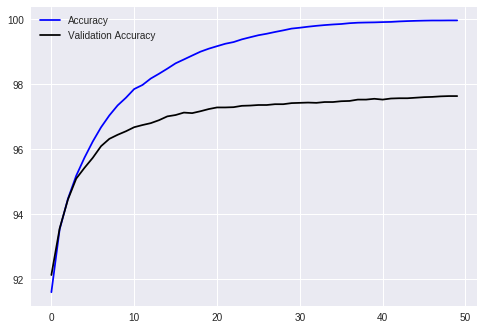

In [44]:
plt.figure(0)
plt.plot(T_A,'b', label= 'Accuracy')
plt.plot(V_A,'black', label = 'Validation Accuracy')
plt.legend()
plt.show()

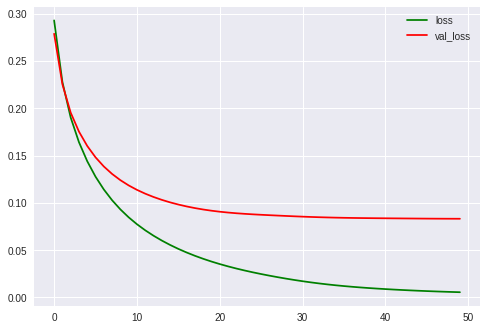

In [45]:
plt.figure(0)
plt.plot(T_L,'g', label = 'loss')
plt.plot(V_L,'r', label = 'val_loss')
plt.legend()
plt.show()

# Testing the NN

In [0]:
def forward_prop2(model,x):
    x = x.reshape(784,)
    z1 = x.dot(model['W1']) + model['B1']
    a1 = np.tanh(z1)
    z2 = a1.dot(model['W2']) + model['B2']
    a2 = np.tanh(z2)
    z3 = a2.dot(model['W3']) + model['B3']
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)
    return y_out

In [0]:
n = 5416
a = x[n:n+1,:]

In [0]:
def pred_and_draw_single(x):
    x = x.reshape(-1,)
    #print (x.shape)
    x = x.reshape((28,28))
    #print (x.shape)
    plt.imshow(x,cmap='gray')
    y_out = forward_prop2(model,x)
    print("The given image has number %d"%(y_out.argmax()))

The given image has number 7


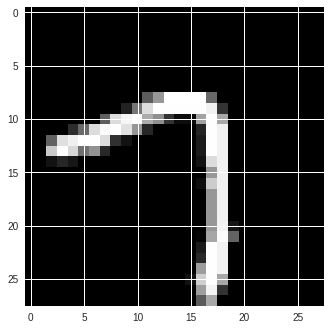

In [49]:
pred_and_draw_single(a)

In [0]:
def draw(x,i):
    plt.figure(i)
    x = x.reshape(-1,)
    x = x.reshape((28,28))
    plt.imshow(x,cmap='gray')

def predactual(x):
    y_out = forward_prop2(model,x)
    print(y_out.argmax())

# For Batch of Examples

In [0]:
s = 500
n = 5
a = x[s:s+n,:]

In [52]:
print(a.shape)

(5, 784)


3
9
5
8
5


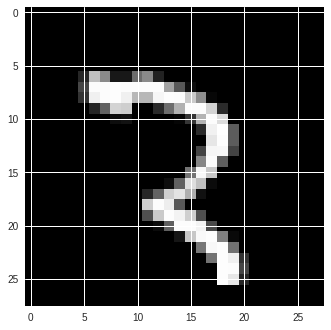

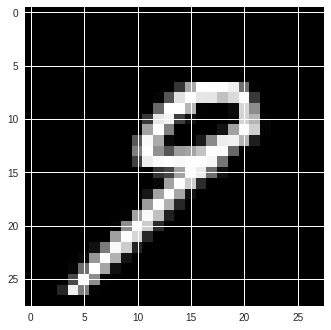

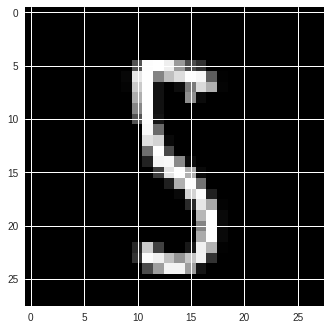

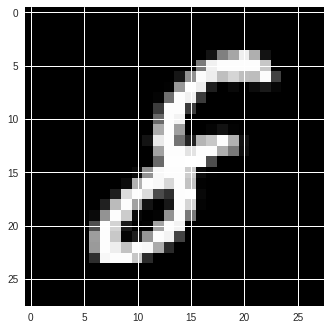

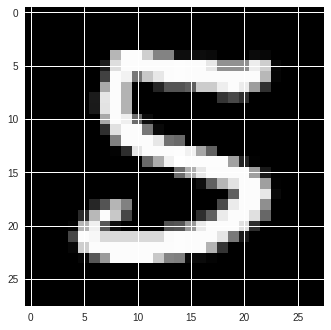

In [53]:
for i in range(n):
    x = a[i:i+1,:]
    draw(x,i)
    predactual(x)

# Accuracy

In [54]:
print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


In [0]:
y_train_pred = []
for i in range(x_train.shape[0]):
    y = forward_prop2(model,x_train[i])
    y_train_pred.append(y.argmax())

In [0]:
y_val_pred = []
for i in range(x_val.shape[0]):
    y = forward_prop2(model,x_val[i])
    y_val_pred.append(y.argmax())

In [0]:
y_test_pred = []
for i in range(x_test.shape[0]):
    y = forward_prop2(model,x_test[i])
    y_test_pred.append(y.argmax())

In [27]:
print (y_train_pred[:10])
print (y_train[:10])

print (y_val_pred[:10])
print (y_val[:10])

print (y_test_pred[:10])
print (y_test[:10])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
[5 0 4 1 9 2 1 3 1 4]
[4, 7, 8, 8, 5, 6, 6, 8, 2, 2]
[4 7 8 8 5 6 6 8 2 2]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7 2 1 0 4 1 4 9 5 9]


In [28]:
accuracy1 = np.sum(np.array(y_train_pred==y_train))/float(y_train.shape[0])
print ("Training Accuracy = ", accuracy1)

Training Accuracy =  0.9997083333333333


In [29]:
accuracy2 = np.sum(np.array(y_val_pred==y_val))/float(y_val.shape[0])
print ("Validation Accuracy = ", accuracy2)

Validation Accuracy =  0.9764166666666667


In [30]:
accuracy3 = np.sum(np.array(y_test_pred==y_test))/float(y_test.shape[0])
print ("Testing Accuracy = ", accuracy3)

Testing Accuracy =  0.9599


In [31]:
print ("Training Accuracy = ", accuracy1)
print ("Validation Accuracy = ", accuracy2)
print ("Testing Accuracy = ", accuracy3)


Training Accuracy =  0.9997083333333333
Validation Accuracy =  0.9764166666666667
Testing Accuracy =  0.9599
